<a href="https://colab.research.google.com/github/Srare3/colaboratory/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリをインポートする

In [1]:
import torch # 機械学習で使う
import torch.nn as nn # torch.nnをnnとしてimport(nn:ニューラルネットワーク)
import torch.optim as optim # モデルの最適化
import torchvision
from torchvision import datasets, transforms # datasets：dataset、transforms：データ前処理
from torch.utils.data import DataLoader # データ前処理やデータのロード
import torch.nn.functional as F

import matplotlib.pyplot as plt # グラフを作る
!pip install japanize-matplotlib
import japanize_matplotlib
import time
import random
import numpy as np
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c2f0c54530d9c8f2c7e0e209a5ae10404cc5ba9aabe80fdc18e0263214112600
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
!curl -sSfL https://raw.githubusercontent.com/VOICEVOX/voicevox_core/8cf307df4412dc0db0b03c6957b83b032770c31a/scripts/downloads/download.sh | bash -s
%cd voicevox_core/
!wget https://github.com/VOICEVOX/voicevox_core/releases/download/0.14.1/voicevox_core-0.14.1+cpu-cp38-abi3-linux_x86_64.whl
!pip install voicevox_core-0.14.1+cpu-cp38-abi3-linux_x86_64.whl
!wget https://raw.githubusercontent.com/VOICEVOX/voicevox_core/406f6c41408836840b9a38489d0f670fb960f412/example/python/run.py

対象OS:linux
対象CPUアーキテクチャ:x64
ダウンロードvoicevox_coreバージョン:0.14.5
ダウンロードデバイスタイプ:cpu
voicevox_coreをhttps://github.com/VOICEVOX/voicevox_core/releases/download/0.14.5/voicevox_core-linux-x64-cpu-0.14.5.zipからファイルをダウンロードします...
open_jtalkをhttps://jaist.dl.sourceforge.net/project/open-jtalk/Dictionary/open_jtalk_dic-1.11/open_jtalk_dic_utf_8-1.11.tar.gzからファイルをダウンロードします...
open_jtalkをダウンロード完了,tar.gz形式で./voicevox_core/open_jtalk_dic_utf_8-1.11に解凍します...
open_jtalk_dic_utf_8-1.11/char.bin
open_jtalk_dic_utf_8-1.11/matrix.bin
open_jtalk_dic_utf_8-1.11/sys.dic
voicevox_coreをダウンロード完了,zip形式で./voicevox_coreに解凍します...
Archive:  /tmp/tmp.FyRXlsbY7z
   creating: ./voicevox_core/voicevox_core-linux-x64-cpu-0.14.5/
  inflating: ./voicevox_core/voicevox_core-linux-x64-cpu-0.14.5/README.txt  
 extracting: ./voicevox_core/voicevox_core-linux-x64-cpu-0.14.5/VERSION  
  inflating: ./voicevox_core/voicevox_core-linux-x64-cpu-0.14.5/libonnxruntime.so.1.13.1  
  inflating: ./voicevox_core/voicevox_core-linux-x64-cpu-0.1

# Cifar10データセットのダウンロードと前処理

In [ ]:
# データ前処理
transform_train = transforms.Compose([transforms.RandomHorizontalFlip(),transforms.ColorJitter(),transforms.RandomRotation(10),transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
transform_test = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# transforms.ToTensor() : 画像をテンソル（行列）に変換する
# transforms.Normalize((0.5,), (0.5,)) : テンソルの各ピクセル値を平均0.5、標準偏差0.5に正規化することで、データのスケールが調整されモデルの学習が安定する

# データセットのダウンロード
# datasetの名前 = datasetのclass('detasetをダウンロードするパス', Trueはtrain、Falseはtest, datasetが存在しない場合の自動ダウンロードの有無, 前処理の設定)
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train) # 訓練データ
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test) # テストデータ

100%|██████████| 170498071/170498071 [00:12<00:00, 13142681.48it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# データをLoaderに流す

Datasetからバッチサイズやシャッフルの有無を指定して格納する

In [ ]:
batch_size = 128 # バッチサイズ：1回のtrainingまたはtest時に一気に何個のdataを使用するか

# loaderの名前 = DataLoader(datasetの名前, batch_size=batch_size, dataのシャッフルの有無)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

cifar10_classes = ('飛行機', '車', '鳥', '猫', '鹿', '犬', 'カエル', '馬', '船', 'トラック')

ダウンロードしたMNISTの訓練データをランダムに表示する

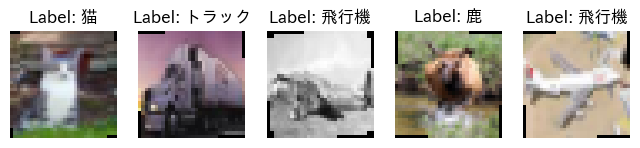

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(8, 3))

for i in range(5):
    random_index = random.randint(0, len(train_dataset) - 1)
    image, label = train_dataset[random_index]
    image = image.permute(1, 2, 0)
    image = (image - image.min()) / (image.max() - image.min())
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {cifar10_classes[label]}")
    axes[i].axis('off')

plt.show()

# ネットワークの定義



```
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        # ここで関数を定義する
    
    def forward(self,x):

        # ここで上記の関数などをつかってモデルを組み立てる
```



In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
         )
        self.classifier = nn.Linear(in_features=4 * 4 * 128, out_features=10)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

nn.Linear(入力, 出力): 指定された入力次元数と出力次元数を持つ全結合層を作る

x.view(-1, 次元数):次元数にテンソルを変換する

torch.relu(x):中間層向けの活性化関数

## 学習の設定

最適化関数：損失関数の値を最小化するようにモデルのパラメータを計算する関数

学習率：パラメータを一度にどの程度変化させるか

損失関数：予測値と正解値の誤差を計算する関数

In [ ]:
# 定義したモデルのインスタンスを宣言
net = Net()

# 最適化、損失、学習率を決める
# optimizer = 最適化関数のクラス(モデルの名前.parameters(), lr=学習率)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9) # 定義したモデルのインスタンスを宣言
# criterion = 損失関数
criterion = nn.CrossEntropyLoss()

# 学習

以下を繰り返す

１. trainloaderからbatch(束)を取り出し、モデルを使って予測値を出す



２. 予測値と正解値の誤差をcriterionで計算する


３. 誤差逆伝播によりパラメータを更新

In [ ]:
num_epochs = 15 # 学習のエポック数
train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []
net = net.cuda()

start_time = time.time()

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    correct_train = 0
    correct_test = 0

    net.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()
        optimizer.zero_grad() # 最適化関数の初期化
        outputs = net(inputs) # 予測値をモデルで出力
        loss = criterion(outputs, labels) # 損失を計算
        loss.backward() # 損失に対してバックプロパゲーション（誤差逆伝播）を行う
        optimizer.step() # 最適化器 optimizer を使用してパラメータを更新
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        if i % 2000 == 1999:
            train_loss = 0.0

    net.eval()
    with torch.no_grad():
        for i, data in enumerate(test_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs = net(inputs) # 予測値をモデルで出力
            loss = criterion(outputs, labels) # 損失を計算
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
        if i % 2000 == 1999:
            test_loss = 0.0

    train_loss_history.append(train_loss / len(train_loader))
    test_loss_history.append(test_loss / len(test_loader))
    train_accuracy_history.append(correct_train / len(train_dataset))
    test_accuracy_history.append(correct_test / len(test_dataset))

    print(f'Epoch [{epoch + 1}/{num_epochs}]')
    print(f'Train Loss: {train_loss_history[-1]:.4f}, Train Accuracy: {train_accuracy_history[-1]:.2%}')
    print(f'Test Loss: {test_loss_history[-1]:.4f}, Test Accuracy: {test_accuracy_history[-1]:.2%}')

end_time = time.time()
elapsed_time = int(end_time - start_time)
print(f"Finished Training. Elapsed Time: {elapsed_time} seconds")

Epoch [1/15]
Train Loss: 0.8361, Train Accuracy: 70.82%
Test Loss: 0.7828, Test Accuracy: 72.90%
Epoch [2/15]
Train Loss: 0.7680, Train Accuracy: 73.30%
Test Loss: 0.7417, Test Accuracy: 74.55%
Epoch [3/15]
Train Loss: 0.7095, Train Accuracy: 75.34%
Test Loss: 0.7123, Test Accuracy: 75.81%
Epoch [4/15]
Train Loss: 0.6623, Train Accuracy: 77.01%
Test Loss: 0.6971, Test Accuracy: 76.27%
Epoch [5/15]
Train Loss: 0.6130, Train Accuracy: 78.60%
Test Loss: 0.6422, Test Accuracy: 78.14%


KeyboardInterrupt: ignored

# 学習の評価

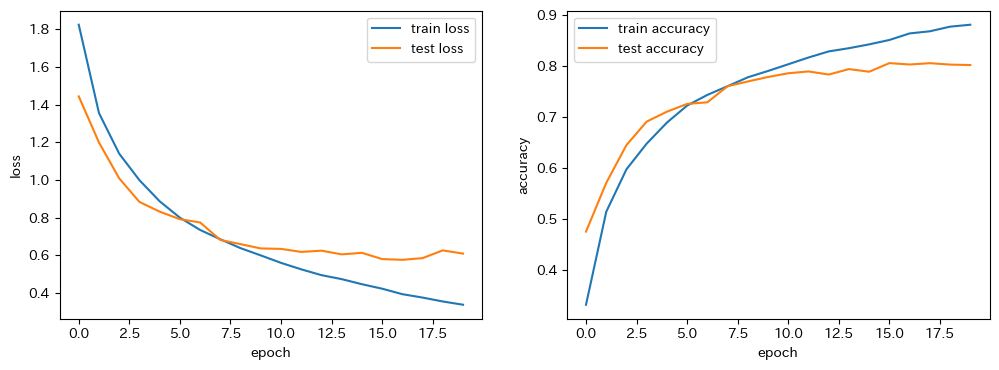

In [ ]:
# 損失と精度のグラフをプロット
plt.figure(figsize=(12, 4))

# 損失のプロット
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='train loss')
plt.plot(test_loss_history, label='test loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

# 精度のプロット
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='train accuracy')
plt.plot(test_accuracy_history, label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

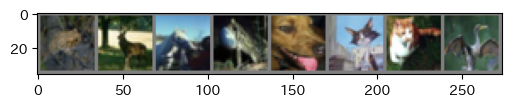

GroundTruth:  カエル   鹿     馬     カエル   犬     猫     猫     鳥    
Predicted:    カエル   鹿     飛行機   カエル   猫     猫     犬     犬    


In [ ]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=True)

net.eval()

dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.cuda(), labels.cuda()

def imshow(img):
    img = img / 2 + 0.5  # 正規化を元に戻す
    npimg = img.numpy()
    plt.figure(figsize=(6, 3))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images.cpu()))
print('GroundTruth: ', ' '.join(f'{cifar10_classes[labels[j]]:5s}' for j in range(8)))

# モデルの予測
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted:   ', ' '.join(f'{cifar10_classes[predicted[j]]:5s}' for j in range(8)))

In [ ]:
test_image_path = '/content/alphard_pc_1.jpg'
test_image = Image.open(test_image_path)
transform_test = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5,))
])
test_image = transform_test(test_image).unsqueeze(0).cuda()

# 推論の実行
net.eval()
with torch.no_grad():
    outputs = net(test_image)
    probabilities = F.softmax(outputs, dim=1)
    _, predicted_class = torch.max(probabilities, 1)

# 予測されたクラスインデックスを対応するクラスラベルにマップ
predicted_label = cifar10_classes[predicted_class.item()]

# 結果の表示
print(f'予測されたクラス: {predicted_label}')

text = (f'{predicted_label}')
speaker_id = 2

!python ./run.py --dict-dir "./open_jtalk_dic_utf_8-1.11" --text $text --out "../data.wav" --speaker-id $speaker_id
from IPython.display import Audio
Audio('../data.wav', autoplay=True)

NameError: ignored